# Base Model

# Training-testing model

In [42]:
import joblib

df_final = joblib.load("processed_data.joblib")

In [16]:
# Drop ID, Name, and target
X = df_final.drop(['Addiction_Level', 'target', 'target_encoded'], axis=1)

# Target variable
y = df_final['target_encoded']

This code prepares the features (X) and target (y) for modeling:

- X → All columns except Addiction_Level, target, and target_encoded (these are the original and processed target columns).

- y → The encoded target variable (0=Low, 1=Medium, 2=High).

Insight:

- Separates inputs (features) from output (target), which is required before training a machine learning model.

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

This code splits the dataset into training and testing sets:

- train_test_split() divides X (features) and y (target) into:

    - X_train, y_train → used to train the model

    - X_test, y_test → used to evaluate the model

- test_size=0.2 → 20% of data is for testing, 80% for training.

- random_state=42 → Ensures the split is reproducible.

Insight:

- Separating train and test sets prevents data leakage.

- Allows evaluation of how well the model generalizes to unseen data.

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

print("After SMOTE:", y_train.value_counts())

After SMOTE: target_encoded
2.0    2043
1.0    2043
0.0    2043
Name: count, dtype: int64


This code applies SMOTE (Synthetic Minority Over-sampling Technique) to balance class distribution in the training set:
- SMOTE generates synthetic samples for minority classes.
    - Apply SMOTE on training data
- Balances all classes in y_train by creating synthetic samples for minority classes.

Insight:

- Helps prevent model bias toward majority classes.

- Ensures all classes are equally represented during training, improving performance on minority classes.

In [25]:
from sklearn.ensemble import RandomForestClassifier
# ---- Train model ----
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

This code trains a Random Forest classifier on your training data:

- RandomForestClassifier(random_state=42) → Initializes the model with a fixed random seed for reproducibility.

- model.fit(X_train, y_train) → Learns patterns from the features (X_train) and target (y_train).

Insight:

- The model is now ready to make predictions on unseen data.

- Random Forest handles non-linear relationships and is robust to overfitting for many features.

In [28]:
y_pred = model.predict(X_test)

This code makes predictions on the test set using the trained model:
- model.predict(X_test) → Uses the Random Forest model to predict the target class for each sample in X_test.

- y_pred → Stores the predicted labels.

Insight:

- These predictions can now be compared with the true labels (y_test) to evaluate model performance.

In [31]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9283333333333333

This code calculates the accuracy of your model on the test set:
- Compares the true labels (y_test) with the predicted labels (y_pred).

- Returns a value between 0 and 1 representing the proportion of correct predictions.

Insight:

- Provides a quick measure of overall model performance.

- Higher accuracy → Model predictions closely match the true target values.

In [34]:
from sklearn.metrics import classification_report

print('Classification Report: \n',classification_report(y_test, y_pred))

Classification Report: 
               precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.84      0.62      0.72        87
         2.0       0.94      0.98      0.96       511

    accuracy                           0.93       600
   macro avg       0.59      0.54      0.56       600
weighted avg       0.92      0.93      0.92       600



This code evaluates the Random Forest model:

- classification_report → Shows precision, recall, F1-score for each class.

- Provides detailed metrics for each class:
  
- Precision → Correct positive predictions / Total predicted positives

- Recall → Correct sample predictions / Total actual positives(sample)

- F1-score → Harmonic mean of precision and recall

- Support → Number of samples per class

Insight:

- The classification report shows how well the model predicts each class, useful for imbalanced datasets.

- Measures overall performance and per-class effectiveness, especially useful for imbalanced targets.

💡 Example:
High precision and recall for High addiction class means the model is good at identifying highly addicted teens.

In [37]:
from sklearn.metrics import balanced_accuracy_score

print("Balanced Accuracy:", balanced_accuracy_score(y_test, y_pred))

Balanced Accuracy: 0.5350113592910003


Balanced Accuracy: 
- Computes the average recall per class.

- Useful for imbalanced datasets where standard accuracy can be misleading.

Insight:

- Balanced accuracy ensures fair evaluation across all classes.

💡 Example:
If many High cases are predicted as Medium, the model struggles with high addiction levels.

[[  0   2   0]
 [  1  54  32]
 [  0   8 503]]


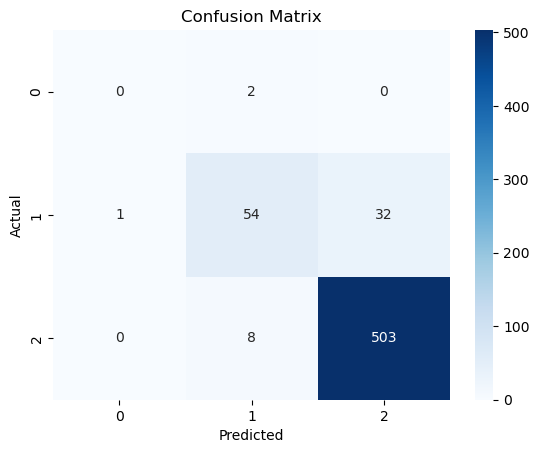

In [46]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
print(cm)

labels = [0, 1, 2]
cm = confusion_matrix(y_test, y_pred, labels=labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

This code computes and prints the confusion matrix for your model:
- confusion_matrix compares the true labels (y_test) with predicted labels (y_pred).

- Returns a matrix showing correct and incorrect predictions for each class.

- - Each cell shows the number of samples for that actual-predicted combination.

Insight:

- Diagonal values → Correct predictions.

- Off-diagonal values → Misclassifications.

- Helps identify which classes the model confuses the most.

           Predicted
           Low Medium High
True Low      0    2   0
True Medium   0    54   32
True High     0    8   503

Low class: 0 correct, 2 predicted as Medium.

Medium class: 54 correct, 32 predicted as High.

High class: 503 correct, 8 predicted as Medium.

In [50]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Age                               3000 non-null   int64  
 1   Daily_Usage_Hours                 3000 non-null   float64
 2   Sleep_Hours                       3000 non-null   float64
 3   Academic_Performance              3000 non-null   int64  
 4   Social_Interactions               3000 non-null   int64  
 5   Exercise_Hours                    3000 non-null   float64
 6   Anxiety_Level                     3000 non-null   int64  
 7   Depression_Level                  3000 non-null   int64  
 8   Self_Esteem                       3000 non-null   int64  
 9   Parental_Control                  3000 non-null   int64  
 10  Screen_Time_Before_Bed            3000 non-null   float64
 11  Phone_Checks_Per_Day              3000 non-null   int64  
 12  Apps_U

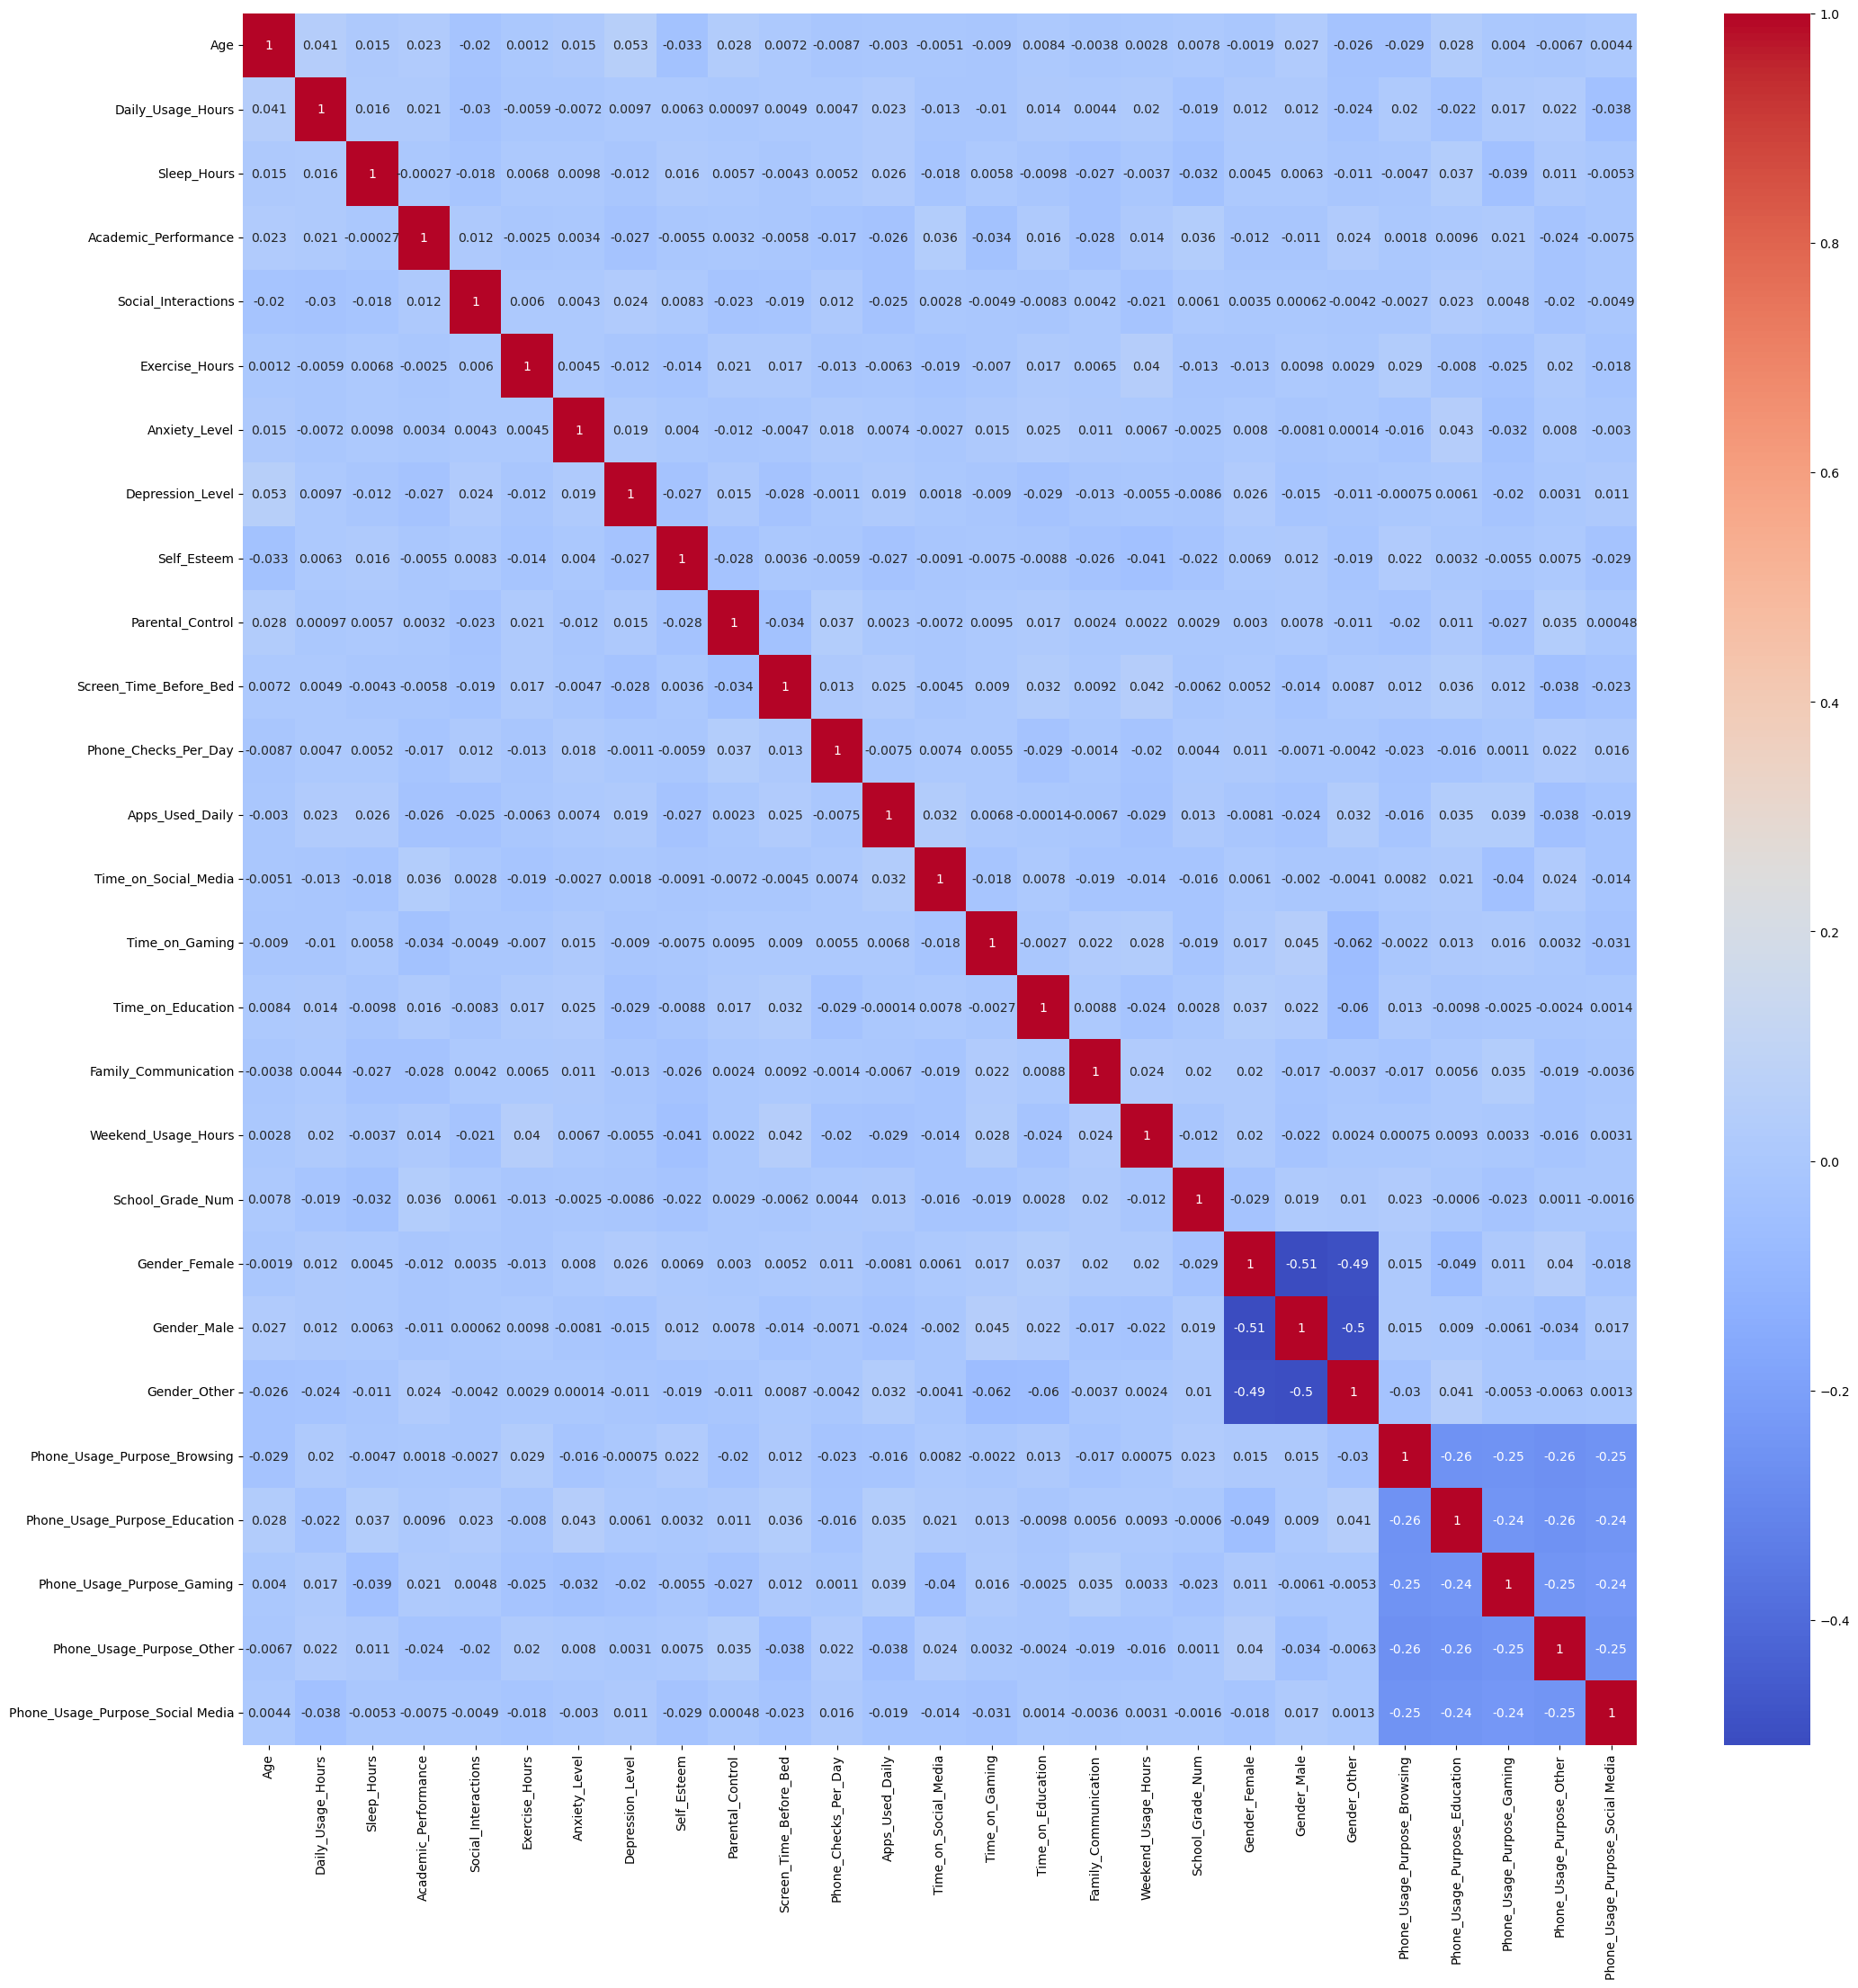

In [58]:
corr_matrix = X.corr()
corr_matrix

plt.figure(figsize=(25,25))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()